# Descriptive Statistics and Python Implementation

In [1]:
import statistics as stat
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr as pr
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pylab as py
warnings.filterwarnings('ignore')

print("Modules Imported Successfuly!")

Modules Imported Successfuly!


In [2]:
df = pd.read_csv('data.csv')

print('Data Imported!')

Data Imported!


In [3]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


## Mean

A **Mean** is the simple mathematical average of a set of two or more numbers.

$$ \mu = \frac{1}{n}\sum_ix_i $$

In [4]:
mean = sum(df.Mthly_HH_Income)/len(df.Mthly_HH_Income)

print("Mean: ",mean)

Mean:  41558.0


In [5]:
print("Mean: ",stat.mean(df.Mthly_HH_Income))

Mean:  41558


## Median

The **Median** is the middle number in a sorted, ascending or descending, list of numbers. It can be more descriptive of that data set than the average.

In [6]:
print("Median: ",stat.median(df.Annual_HH_Income))

Median:  447420.0


## Mode

The **Mode** is the value that appears most frequently in a data set.  
A set of data may have one mode, more than one mode, or no mode at all.

In [7]:
print("Mode: ",stat.mode(df.No_of_Fly_Members))

Mode:  4


## Variance

The **Variance** refers to a statistical measurement of the spread between numbers in a data set.

$$ \sigma^2 = \frac{1}{n}\sum_i(x_i-\mu)^2 $$

In [8]:
print("Variance of Annual Household Income: ",stat.variance(df.Annual_HH_Income))

Variance of Annual Household Income:  102486925397.91672


## Standard Deviation

A **Standard Deviation** is a statistic that measures the dispersion of a dataset relative to its mean.

In [9]:
print("Standard Deviation of Annual Household Income: ",stat.stdev(df.Annual_HH_Income))

Standard Deviation of Annual Household Income:  320135.7921225253


## Correlation

**Correlation** coefficients are indicators of the strength of the linear relationship between two different variables, x and y.  
- Linear correlation coefficient that is greater than zero indicates a positive relationship.  
- A value that is less than zero signifies a negative relationship.  
- Finally, a value of zero indicates no relationship between the two variables x and y.

In [10]:
corr, _ = pr(df.Mthly_HH_Income, df.Annual_HH_Income)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.970


## Normal Distribution

**Normal Distribution** is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.  
In graph form, normal distribution will appear as a bell curve.

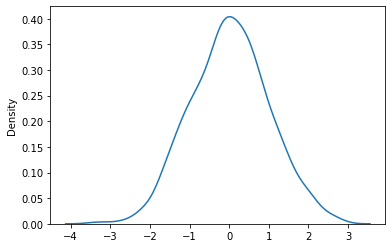

In [11]:

sns.kdeplot(np.random.normal(size=1000))

plt.show()

## Feature of Normal Distribution

- The mean, median and mode are exactly the same.
- The distribution is symmetric about the mean—half the values fall below the mean and half above the mean.
- The distribution can be described by two values: the mean and the standard deviation.
- Mean, median, mode, and standard deviation in a normal distribution.
- The mean is the location parameter while the standard deviation is the scale parameter.
- The mean determines where the peak of the curve is centered.
- Increasing the mean moves the curve right, while decreasing it moves the curve left.
- The standard deviation stretches or squeezes the curve.
- A small standard deviation results in a narrow curve, while a large standard deviation leads to a wide curve.

## Positively Skewed & Negatively Skewed Normal Distribution

A **Positively Skewed** (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

<AxesSubplot:xlabel='No_of_Earning_Members', ylabel='Density'>

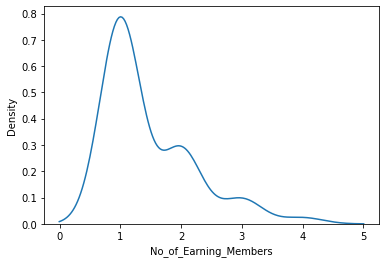

In [12]:
sns.kdeplot(df.No_of_Earning_Members)

A **Negatively Skewed** (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

<AxesSubplot:xlabel='Emi_or_Rent_Amt', ylabel='Density'>

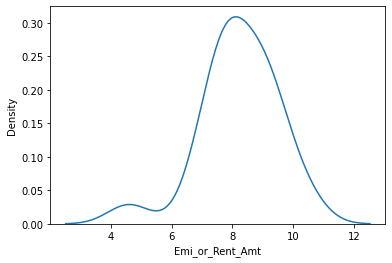

In [13]:
sns.kdeplot(np.log((df.Emi_or_Rent_Amt)-900))

- The positively skewed distribution is a direct opposite of the negatively skewed distribution.

## Effect on Mean, Median and Mode due to Skewness

<AxesSubplot:ylabel='Count'>

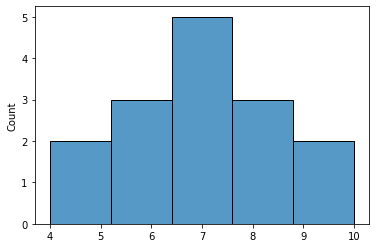

In [14]:
a = [4,5,6,6,6,7,7,7,7,7,8,8,8,9,10]
sns.histplot(a)

In [15]:
print("Mean: ", stat.mean(a))
print("Median: ", stat.median(a))
print("Mode: ", stat.mode(a))

Mean:  7
Median:  7
Mode:  7


- This is a perfectly symmetrical distribution of data.  
- The mean, mode and median is same.

<AxesSubplot:ylabel='Count'>

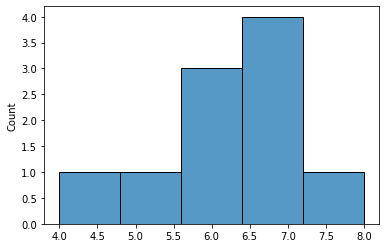

In [16]:
a_right = [4,5,6,6,6,7,7,7,7,8]
sns.histplot(a_right)

In [17]:
print("Mean: ", stat.mean(a_right))
print("Median: ", stat.median(a_right))
print("Mode: ", stat.mode(a_right))

Mean:  6.3
Median:  6.5
Mode:  7


- This is a left skewed distribution of data.  
- The mean is less than median and they both in turn are less than mode.

<AxesSubplot:ylabel='Count'>

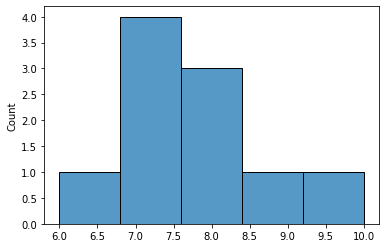

In [18]:
a_left = [6,7,7,7,7,8,8,8,9,10]
sns.histplot(a_left)

In [19]:
print("Mean: ", stat.mean(a_left))
print("Median: ", stat.median(a_left))
print("Mode: ", stat.mode(a_left))

Mean:  7.7
Median:  7.5
Mode:  7


- This is a right skewed distribution of data.  
- The mean is greater than median and they both in turn are greater than mode.

## Explain QQ Plot and show the implementation of the same

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

A 45-degree reference line is also plotted.  
If the two sets come from a population with the same distribution, the points should fall approximately along this reference line.  
The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.

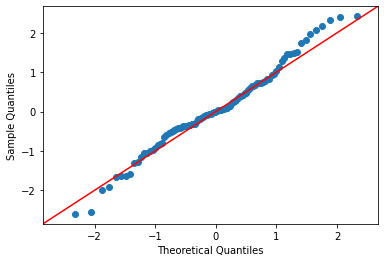

In [20]:
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(data_points, line ='45')
py.show()

## Explain Box Cox and show the implementation of the same

A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape.

In [21]:
original_data = np.random.exponential(size = 1000)
  

fitted_data, fitted_lambda = stats.boxcox(original_data)

Lambda value used for Transformation: 0.26678642329976304


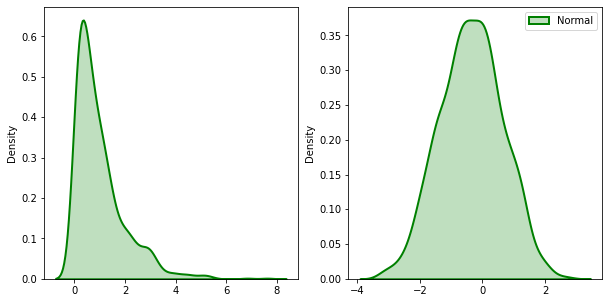

In [22]:
fig, ax = plt.subplots(1, 2)

sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

plt.legend(loc = "upper right")

fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")